# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key 
# Protect your API in another document.

from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [35]:
cities_df = pd. DataFrame(cities)
df = cities_df.rename(columns={0:"Name"})
df.head()


,Name
0,mianwali
1,vaini
2,hobart
3,bambous virieux
4,nikolskoye


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Iterate trough the rows of the DataFrame, taking the name as the "Key" ans searching the weather of it. 
x = 1 
for index, row in df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # To obtain results in "imperial" system. If metric system wanted, then change units to "metric"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    city = row['Name']
    response = requests.get(query_url + city).json()
    n = 1
    nn = 50
    # Complete the DataFrame with the columns that we want. If there's any city whit lacking information, pass to the next
    try:    
         
        df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        df.loc[index,"Country"] = response["sys"]["country"]
        df.loc[index,"Date"] = response["dt"]
        df.loc[index,"Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response['coord']['lat']
        df.loc[index,"Lng"] = response["coord"]["lon"]
        df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        
        # try to do it using counters and another for 
        if index < 50: 
            x=1
            print(f"Processing Record {index} of Set {x} | {city}")   
        elif index <100: 
            x=2
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <150: 
            x = 3
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <200: 
            x = 4
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <250: 
            x = 5
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <300: 
            x = 6
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <350: 
            x = 7
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <400: 
            x = 8
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <450: 
            x = 9
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <500: 
            x = 10
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <550: 
            x = 11
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <600: 
            x = 12
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <650: 
            x = 13
            print(f"Processing Record {index} of Set {x} | {city}")
            

        
    except (KeyError, IndexError):
        pass
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | mianwali
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | kalmunai
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | ampanihy
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kayerkan
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | salalah
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1 | catuday
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | mi

Processing Record 202 of Set 5 | maues
Processing Record 203 of Set 5 | gravdal
Processing Record 204 of Set 5 | richards bay
Processing Record 205 of Set 5 | coquimbo
Processing Record 206 of Set 5 | pisco
Processing Record 207 of Set 5 | kovdor
City not found. Skipping...
Processing Record 209 of Set 5 | victoria point
Processing Record 210 of Set 5 | chuy
Processing Record 211 of Set 5 | emba
Processing Record 212 of Set 5 | carnarvon
Processing Record 213 of Set 5 | vostok
Processing Record 214 of Set 5 | yima
Processing Record 215 of Set 5 | henties bay
Processing Record 216 of Set 5 | sinnamary
Processing Record 217 of Set 5 | longyearbyen
Processing Record 218 of Set 5 | alta floresta
Processing Record 219 of Set 5 | karasjok
Processing Record 220 of Set 5 | galesong
Processing Record 221 of Set 5 | riviere-au-renard
Processing Record 222 of Set 5 | kodiak
Processing Record 223 of Set 5 | karatuzskoye
Processing Record 224 of Set 5 | ahipara
Processing Record 225 of Set 5 | abal

Processing Record 403 of Set 9 | chernyshevsk
Processing Record 404 of Set 9 | usinsk
Processing Record 405 of Set 9 | batemans bay
City not found. Skipping...
Processing Record 407 of Set 9 | meadow lake
Processing Record 408 of Set 9 | newcastle
City not found. Skipping...
Processing Record 410 of Set 9 | bouca
Processing Record 411 of Set 9 | chuzhou
Processing Record 412 of Set 9 | flinders
Processing Record 413 of Set 9 | whitehorse
Processing Record 414 of Set 9 | nehe
Processing Record 415 of Set 9 | altay
Processing Record 416 of Set 9 | benghazi
City not found. Skipping...
Processing Record 418 of Set 9 | turkmenabat
Processing Record 419 of Set 9 | palana
Processing Record 420 of Set 9 | kungurtug
Processing Record 421 of Set 9 | kuching
Processing Record 422 of Set 9 | pangnirtung
Processing Record 423 of Set 9 | saint-georges
Processing Record 424 of Set 9 | petropavlivka
Processing Record 425 of Set 9 | byron bay
Processing Record 426 of Set 9 | chrzanow
Processing Record 

Processing Record 602 of Set 13 | porto walter
Processing Record 603 of Set 13 | yuli
Processing Record 604 of Set 13 | mayor pablo lagerenza
Processing Record 605 of Set 13 | pedasi
Processing Record 606 of Set 13 | vezirkopru
City not found. Skipping...
Processing Record 608 of Set 13 | marsh harbour
Processing Record 609 of Set 13 | krasnaya polyana
Processing Record 610 of Set 13 | campbell river
Processing Record 611 of Set 13 | dandong
Processing Record 612 of Set 13 | luau
Processing Record 613 of Set 13 | rabo de peixe



 ## Convert Raw Data to DataFrame
Export the city data into a .csv. and Display the DataFrame

In [19]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

# Summarize columns object count 
df.count()

Name          591
Cloudiness    522
Country       522
Date          522
Humidity      522
Lat           522
Lng           522
Max Temp      522
Wind Speed    522
dtype: int64

In [20]:
# Leave behing (dropping) all rows that has any of the columns 
df = df.dropna()

df["Date"] = df["Date"].astype(int)

# Showing complete DataFrame
df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,batemans bay,0.0,AU,1551579904,32.0,-35.71,150.18,84.00,1.99
1,vaini,0.0,IN,1551574800,55.0,15.34,74.49,60.80,1.72
2,haapiti,20.0,PF,1551579182,62.0,-17.57,-149.87,89.60,4.70
3,rikitea,0.0,PF,1551579934,100.0,-23.12,-134.97,79.27,11.23
4,lebu,0.0,ET,1551574800,67.0,8.96,38.73,59.00,2.24


In [21]:
# Transform "Date" column from Unix into DayTime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],unit='s')

df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,batemans bay,0.0,AU,2019-03-03 02:25:04,32.0,-35.71,150.18,84.00,1.99
1,vaini,0.0,IN,2019-03-03 01:00:00,55.0,15.34,74.49,60.80,1.72
2,haapiti,20.0,PF,2019-03-03 02:13:02,62.0,-17.57,-149.87,89.60,4.70
3,rikitea,0.0,PF,2019-03-03 02:25:34,100.0,-23.12,-134.97,79.27,11.23
4,lebu,0.0,ET,2019-03-03 01:00:00,67.0,8.96,38.73,59.00,2.24


In [22]:
# Save Data into a csv
df.to_csv("WeatherPy.csv")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

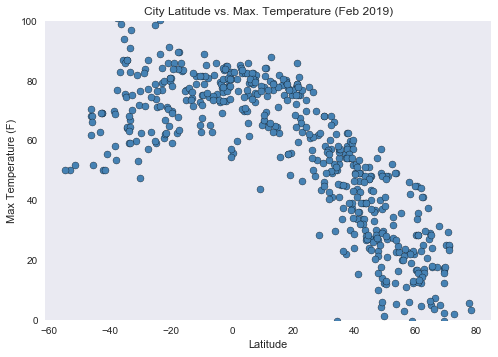

In [43]:
##Scarett plot Latitude vs. Max Temp 

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Max Temp"]

# Plot title and labels 
plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Limit the y axis 
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Temperature Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Humidity Plot

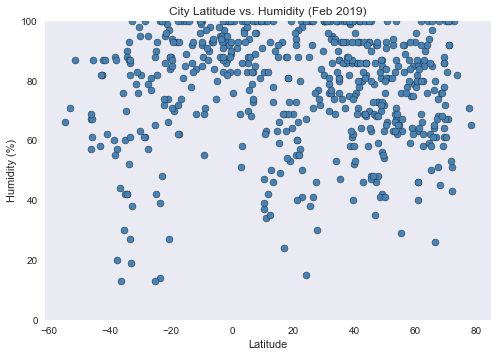

In [38]:
## Scarett plot Latitude vs. Humidity

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Humidity"]

# Plot title and labels 

plt.title("City Latitude vs. Humidity (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Limit the y axis
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Humidity Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Cloudiness Plot

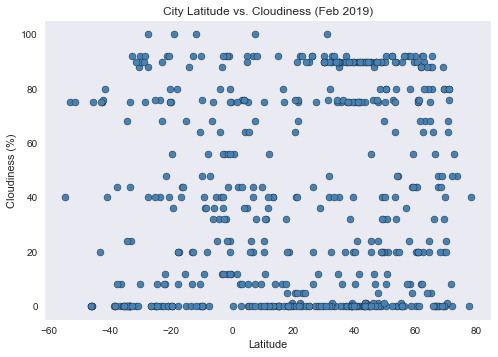

In [39]:
# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Cloudiness"]

# Plot title and labels 
plt.title("City Latitude vs. Cloudiness (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Cloudiness Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Wind Speed Plot

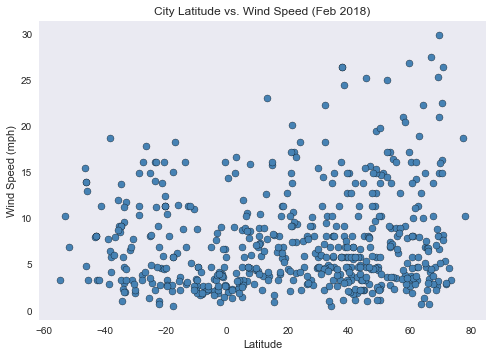

In [40]:
## Scarett plot Latitude vs. Wind Speed Plot

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Wind Speed"]

# Plot title and labels 
plt.title("City Latitude vs. Wind Speed (Feb 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Wind Speed Plot.png")

#Show plot 
plt.show()

In [ ]:
#Carolina Muizzi